In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

print('Successfully imported')

C:\Users\ELCOT\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Successfully imported


In [3]:
#Reading data
data = pd.read_csv('project2.csv')
data.head(30)

,Timestamp,Timestamp.1,Timestamp.2,Timestamp.3,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,27-08-2014 11:31,33,Male,United States,TN,NaN,Yes,No,Sometimes,Jun-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,27-08-2014 11:31,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,01-May,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,27-08-2014 11:32,39,M,Canada,NaN,NaN,No,No,Never,01-May,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,27-08-2014 11:32,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,27-08-2014 11:32,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [4]:
df = pd.read_csv("project2.csv")

In [5]:
df.shape

(41, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  41 non-null     object
 1   Timestamp.1                41 non-null     int64 
 2   Timestamp.2                41 non-null     object
 3   Timestamp.3                41 non-null     object
 4   state                      27 non-null     object
 5   self_employed              23 non-null     object
 6   family_history             41 non-null     object
 7   treatment                  41 non-null     object
 8   work_interfere             37 non-null     object
 9   no_employees               41 non-null     object
 10  remote_work                41 non-null     object
 11  tech_company               41 non-null     object
 12  benefits                   41 non-null     object
 13  care_options               41 non-null     object
 14  wellness_pro

In [7]:
df.isna().sum()

Timestamp                     0
Timestamp.1                   0
Timestamp.2                   0
Timestamp.3                   0
state                        14
self_employed                18
family_history                0
treatment                     0
work_interfere                4
no_employees                  0
remote_work                   0
tech_company                  0
benefits                      0
care_options                  0
wellness_program              0
seek_help                     0
anonymity                     0
leave                         0
mental_health_consequence     0
phys_health_consequence       0
coworkers                     0
supervisor                    0
mental_health_interview       0
phys_health_interview         0
mental_vs_physical            0
obs_consequence               0
comments                     35
dtype: int64

In [8]:
self_employed_percent = (df["self_employed"].isnull().sum()/len(df["self_employed"]))*100
work_interfere_percent = (df["work_interfere"].isnull().sum()/len(df["work_interfere"]))*100

print(f"The percentage of missing values in self_employed column is {round(self_employed_percent, 2)}%")
print(f"The percentage of missing values in work_interfere column is {round(work_interfere_percent, 2)}%")

The percentage of missing values in self_employed column is 43.9%
The percentage of missing values in work_interfere column is 9.76%


In [9]:
df["self_employed"] = df["self_employed"].fillna(df["self_employed"].mode()[0])

df["work_interfere"] = df["work_interfere"].fillna(df["work_interfere"].mode()[0])

In [10]:
df.head()

,Timestamp,Timestamp.1,Timestamp.2,Timestamp.3,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27-08-2014 11:29,37,Female,United States,IL,No,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27-08-2014 11:29,44,M,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27-08-2014 11:29,32,Male,Canada,NaN,No,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27-08-2014 11:29,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27-08-2014 11:30,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [11]:
df.drop(["state", "comments"], axis=1, inplace=True)

In [12]:
df.isna().sum()

Timestamp                    0
Timestamp.1                  0
Timestamp.2                  0
Timestamp.3                  0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [13]:
df.columns

Index(['Timestamp', 'Timestamp.1', 'Timestamp.2', 'Timestamp.3',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

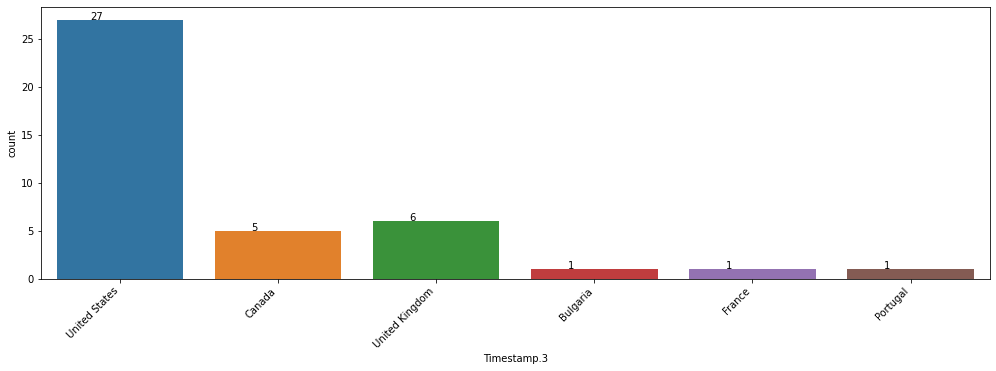

In [14]:
plt.figure(figsize=(17,5))
ax = sns.countplot(x='Timestamp.3', data=df)

ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right'    
)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

In [15]:
min_age = df["Timestamp.1"].min()
max_age = df["Timestamp.1"].max()
mean_age = df["Timestamp.1"].mean()
median_age = df["Timestamp.1"].median()

print(f"Min: {min_age}, \nMax: {max_age}, \nMean: {mean_age}, \nMedian: {median_age}")

Min: 23, 
Max: 50, 
Mean: 34.390243902439025, 
Median: 33.0


In [16]:
df["Timestamp.1"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24], dtype=int64)

In [17]:
negative_age = (df["Timestamp.1"]<0).sum()
over_age = (df["Timestamp.1"]>80).sum()

print(f"Number of negative age entries: {negative_age}\nNumber of overage: {over_age}")

Number of negative age entries: 0
Number of overage: 0


In [18]:
df["Timestamp.1"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24], dtype=int64)

<AxesSubplot:>

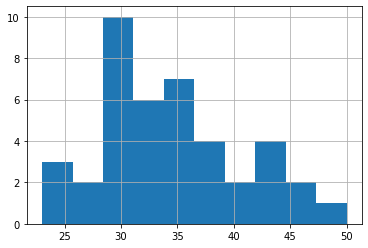

In [19]:
df["Timestamp.1"].hist()

<AxesSubplot:xlabel='Timestamp.1'>

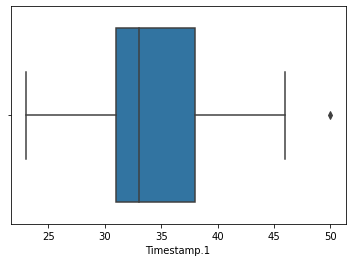

In [20]:
sns.boxplot(x=df["Timestamp.1"])

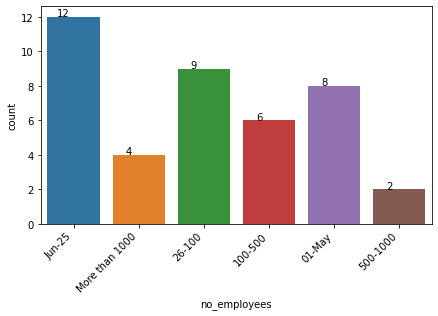

In [28]:

plt.figure(figsize=(7,4))
ax = sns.countplot(x='no_employees', data=df)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')
# Then we also display the values for each bar above it;
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

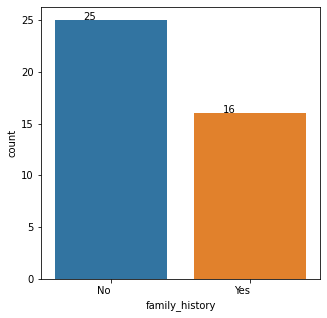

In [29]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='family_history', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

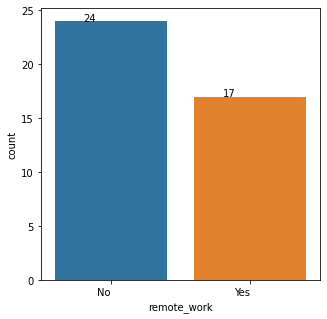

In [46]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='remote_work', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(),  (p.get_x()+0.25, p.get_height()+0.01), ha='center')

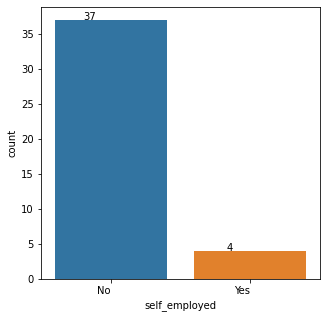

In [31]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x='self_employed', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

In [47]:
df["Timestamp.1"].head()

0    37
1    44
2    32
3    31
4    31
Name: Timestamp.1, dtype: int64

In [35]:
df_year = pd.to_datetime(df["Timestamp.1"]).dt.year
df_year.head()

0    1970
1    1970
2    1970
3    1970
4    1970
Name: Timestamp.1, dtype: int64

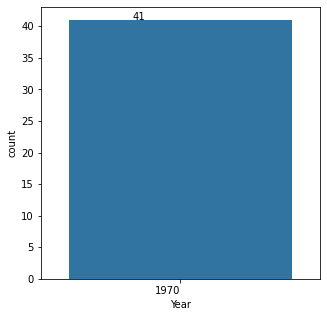

In [36]:
df["Year"] = df_year

plt.figure(figsize=(5,5))
ax = sns.countplot(x='Year', data=df)
ax.set_xticklabels(ax.get_xticklabels(),
                   horizontalalignment='right')
for p in ax.patches:
   ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+0.01), ha='center')

In [37]:
df.describe()

,Timestamp.1,Year
count,41.000000,41.0
mean,34.390244,1970.0
std,6.328025,0.0
min,23.000000,1970.0
25%,31.000000,1970.0
50%,33.000000,1970.0
75%,38.000000,1970.0
max,50.000000,1970.0


In [38]:
print(f'Family History Unique Entries: {df["family_history"].unique()}')

Family History Unique Entries: ['No' 'Yes']


In [40]:
df["family_history_num"] = df["family_history"].map({"No": 0, "Yes": 1})


In [41]:
df[["family_history", "family_history_num"]].head()

,family_history,family_history_num
0,No,0
1,No,0
2,No,0
3,Yes,1
4,No,0


In [42]:

print(f'Self Employed Unique Entries: {df["self_employed"].unique()}'
      f'\nTreatment Unique Entries: {df["treatment"].unique()}'
      f'\nRemote Work Unique Entries: {df["remote_work"].unique()}'
      f'\nBenefits Unique Entries: {df["benefits"].unique()}'
      f'\nWellness Program Unique Entries: {df["wellness_program"].unique()}'
      f'\nSeek Help Unique Entries: {df["seek_help"].unique()}'
      f'\nAnonymity Unique Entries: {df["anonymity"].unique()}'
      f'\nMental Health Consequence Unique Entries: {df["mental_health_consequence"].unique()}'
      f'\nPhy. Health Consequence Unique Entries: {df["phys_health_consequence"].unique()}')

Self Employed Unique Entries: ['No' 'Yes']
Treatment Unique Entries: ['Yes' 'No']
Remote Work Unique Entries: ['No' 'Yes']
Benefits Unique Entries: ['Yes' "Don't know" 'No']
Wellness Program Unique Entries: ['No' "Don't know" 'Yes']
Seek Help Unique Entries: ['Yes' "Don't know" 'No']
Anonymity Unique Entries: ['Yes' "Don't know" 'No']
Mental Health Consequence Unique Entries: ['No' 'Maybe' 'Yes']
Phy. Health Consequence Unique Entries: ['No' 'Yes' 'Maybe']


In [43]:
df["self_employed_num"] = df["self_employed"].map({"No": 0, "Yes": 1})
df["treatment_num"] = df["treatment"].map({"No": 0, "Yes": 1})
df["remote_work_num"] = df["remote_work"].map({"No": 0, "Yes": 1})
df["benefits_num"] = df["benefits"].map({"No": 0, "Yes": 1, "Don't know": 2})
df["wellness_programs_num"] = df["wellness_program"].map({"No": 0, "Yes": 1, "Don't know": 2})
df["seek_help_num"] = df["seek_help"].map({"No": 0, "Yes": 1, "Don't know": 2})
df["anonymity_num"] = df["anonymity"].map({"No": 0, "Yes": 1, "Don't know": 2})
df["mental_health_consequence_num"] = df["mental_health_consequence"].map({"No": 0, "Yes": 1, "Maybe": 2})
df["phys_health_consequence_num"] = df["phys_health_consequence"].map({"No": 0, "Yes": 1, "Maybe": 2})

<AxesSubplot:>

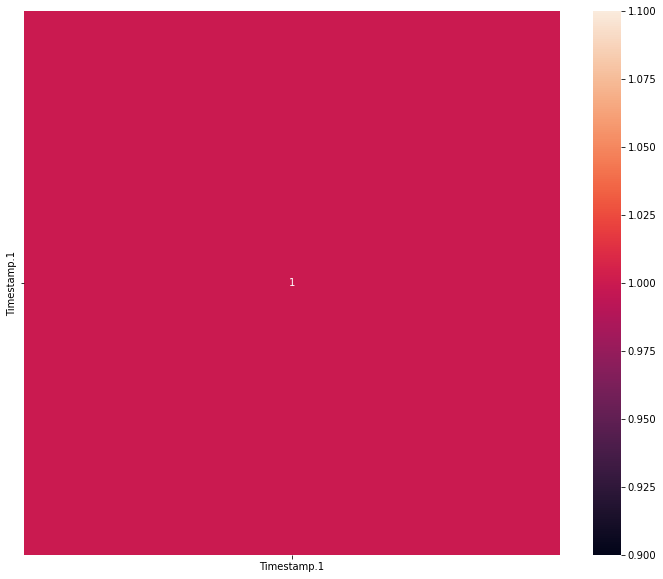

In [45]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)